In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
import statistics

In [3]:
data_battle = pd.read_csv('battles.csv', index_col=0)

In [12]:
data_deaths = pd.read_csv('character-deaths.csv', index_col=0)

In [13]:
data_pred = pd.read_csv('character-predictions.csv', index_col=0)

In [14]:
data_battle.dropna(subset=['attacker_king','defender_king', 'attacker_outcome'], inplace = True)

In [15]:
data_deaths.dropna(axis = 0, inplace = True)
data_deaths['Dead'] = 1

(0, 100)

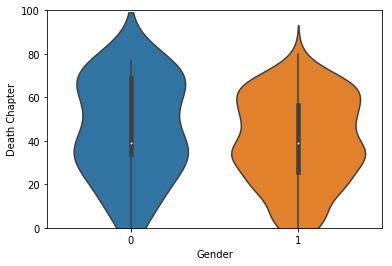

In [38]:

sns.violinplot(x='Gender', y='Death Chapter', data= data_deaths).set_ylim(0,100)

In [17]:
data_battle.attacker_outcome = data_battle.attacker_outcome.map({'win':1, 'loss':0}).astype(float)
battleOLS = ols('attacker_outcome~C(attacker_king)*C(defender_king)', data=data_battle).fit()
anova_lm(battleOLS, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(attacker_king),3.0,0.741629,0.247210,2.214820,0.114926
C(defender_king),5.0,0.751836,0.150367,1.347182,0.281908
C(attacker_king):C(defender_king),15.0,1.914832,0.127655,1.143701,0.377957
Residual,22.0,2.455556,0.111616,NaN,NaN


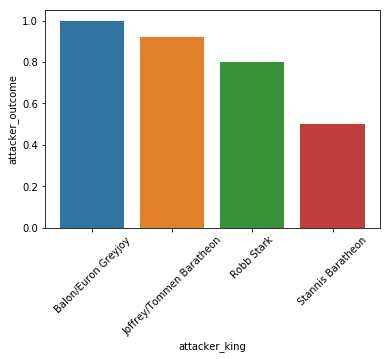

In [18]:
p = sns.barplot(x = 'attacker_king', y = 'attacker_outcome', data=data_battle.groupby('attacker_king').mean().reset_index())
plt.xticks(rotation=45)
p.plot()
plt.show()


In [19]:
num_dead_noble_women = data_deaths.groupby(['Nobility','Gender']).sum().reset_index()
num_dead_noble_women

,Nobility,Gender,Death Year,Book of Death,Death Chapter,Book Intro Chapter,GoT,CoK,SoS,FfC,DwD,Dead
0,0,0,7184.0,80.0,1093.0,735.0,8,5,7,1,9,24
1,0,1,47554.0,443.0,6108.0,4498.0,41,64,67,17,24,159
2,1,0,2695.0,28.0,395.0,186.0,2,5,6,1,0,9
3,1,1,29912.0,288.0,4196.0,3024.0,52,53,40,10,14,100


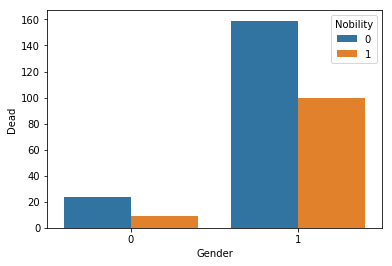

In [20]:
sns.barplot(x = 'Gender',y='Dead', hue='Nobility',data = num_dead_noble_women)

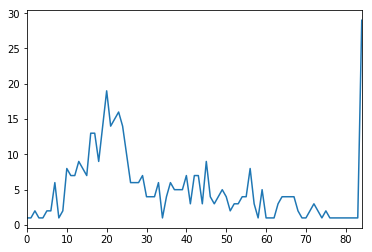

In [56]:
age.isAlive.plot()

In [57]:
data_pred[data_pred.age>=80]

,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
56,0,0,0.000,1.000,Naerys Targaryen,PrincessQueen,0,Valyrian,138.0,NaN,...,NaN,0.0,1,1,100.0,12,1,0,0.220736,0
86,0,0,0.004,0.996,Rhaena Targaryen (daughter of Daemon),Lady,0,NaN,116.0,NaN,...,NaN,1.0,1,1,100.0,0,0,0,0.143813,0
87,0,0,0.000,1.000,Rhaena Targaryen (daughter of Aegon III),PrincessSepta,0,Valyrian,147.0,NaN,...,NaN,NaN,0,1,100.0,0,0,0,0.073579,0
234,0,0,0.002,0.998,Uthor Underleaf,Ser,1,NaN,181.0,NaN,...,NaN,NaN,0,1,100.0,0,0,0,0.050167,0
286,0,0,0.001,0.999,Aegon Targaryen (son of Jaehaerys I),Prince,0,Valyrian,50.0,NaN,...,NaN,NaN,0,1,100.0,0,0,0,0.000000,0
388,1,1,0.891,0.109,Bryen,NaN,1,NaN,220.0,NaN,...,NaN,NaN,0,0,85.0,0,0,0,0.016722,1
431,0,0,0.000,1.000,Daella Targaryen (daughter of Maekar I),Princess,1,Valyrian,199.0,NaN,...,NaN,NaN,0,1,100.0,0,0,0,0.080268,0
432,0,0,0.005,0.995,Daenerys Targaryen (daughter of Aegon IV),Princess,0,NaN,172.0,NaN,...,NaN,1.0,1,1,100.0,10,1,0,0.093645,0


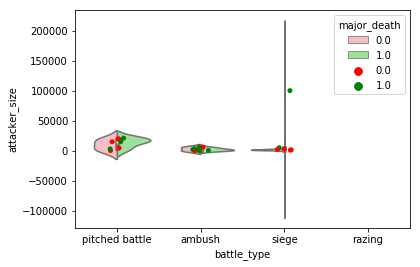

In [4]:
violin = sns.violinplot(x= 'battle_type',hue='major_death',split= True, data=data_battle,y='attacker_size', legend_out=True,palette=["lightpink","lightgreen"])
sns.stripplot(x= 'battle_type',data=data_battle,y='attacker_size',hue='major_death', jitter=True,palette=["red", "green"])

In [115]:
data_battle.corr()

,year,battle_number,defender_3,defender_4,attacker_outcome,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.909814,NaN,NaN,NaN,-0.333712,-0.151506,0.179447,-0.417430,-0.829300
battle_number,0.909814,1.000000,NaN,NaN,NaN,-0.280256,-0.070467,0.114007,-0.366811,-0.810213
defender_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defender_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacker_outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
major_death,-0.333712,-0.280256,NaN,NaN,NaN,1.000000,0.278593,0.267966,0.081815,0.321465
major_capture,-0.151506,-0.070467,NaN,NaN,NaN,0.278593,1.000000,0.331961,0.249510,0.144338
attacker_size,0.179447,0.114007,NaN,NaN,NaN,0.267966,0.331961,1.000000,-0.109572,-0.313343
defender_size,-0.417430,-0.366811,NaN,NaN,NaN,0.081815,0.249510,-0.109572,1.000000,0.420994
summer,-0.829300,-0.810213,NaN,NaN,NaN,0.321465,0.144338,-0.313343,0.420994,1.000000


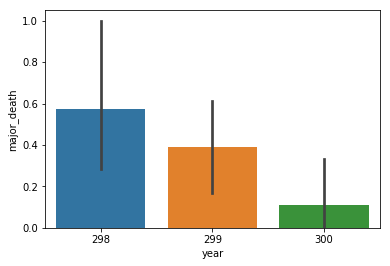

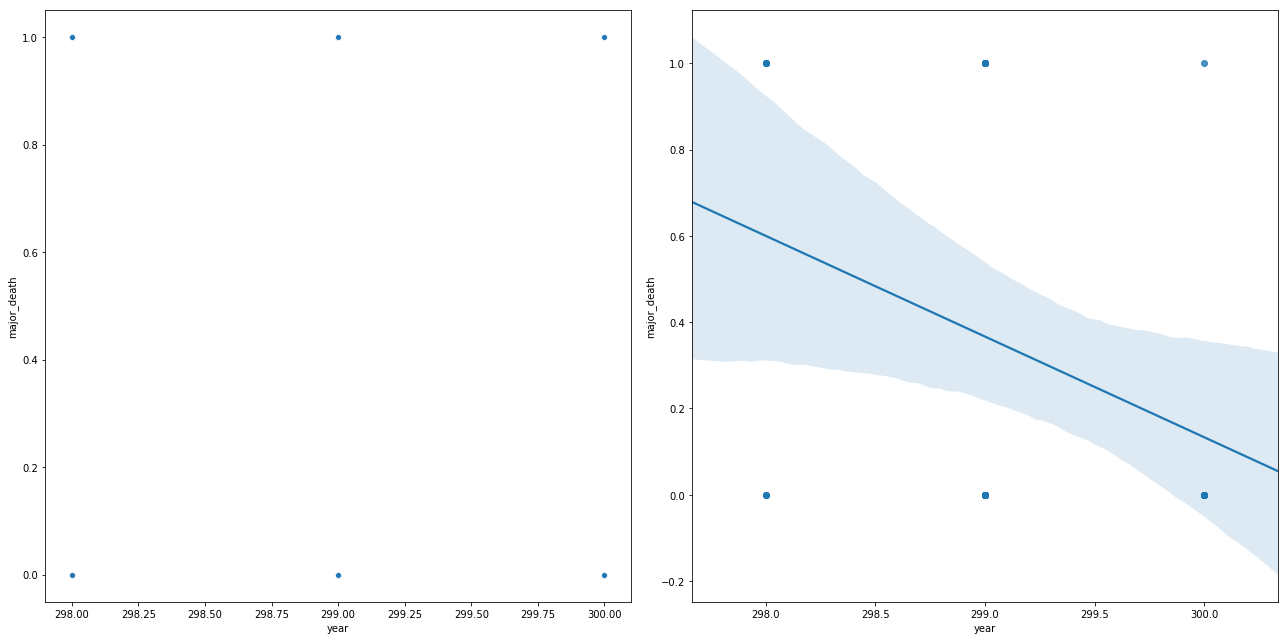

In [124]:
sns.barplot(x = 'year',y='major_death',data = data_battle)

#plotting
fig, ax = plt.subplots(figsize=(18,9),ncols=2)
sns.scatterplot(data = data_battle, y = 'major_death',x='year', ax= ax[0])
sns.regplot(data = data_battle, y = 'major_death',x='year',ax=ax[1])

fig.tight_layout()
# get the slope with scipy
#slope, intercept, r_value, p_value, std_err = stats.linregress(specific_time['MeanRT'],specific_time['AccuracyTime'])

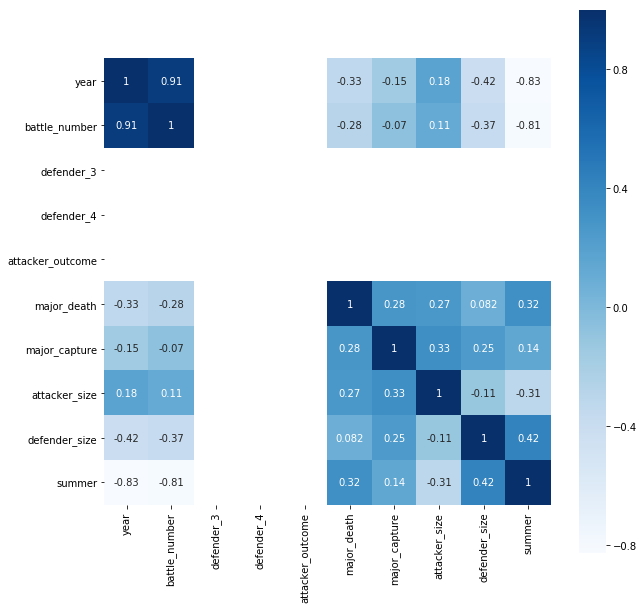

In [135]:
correlation=data_battle.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Blues')
plt.show()